In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Cloning the repository from Github

In [ ]:
!git clone https://github.com/gargsid/receipt_data_prediction_app.git -q

In [ ]:
%cd receipt_data_prediction_app

/content/receipt_data_prediction_app


In [ ]:
def read_csv():
  df = pd.read_csv('assets/data/ML_data_daily.csv')
  df['dates'] = pd.date_range(start='1/1/2021', end='31/12/2021', freq='D')
  new_df = df.groupby(pd.Grouper(key = 'dates', freq = 'M'))['Receipt_Count'].sum().reset_index()
  return new_df

### Data Analysis

<ipython-input-3-9a044ee1a06e>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dates'] = pd.date_range(start='1/1/2021', end='31/12/2021', freq='D')


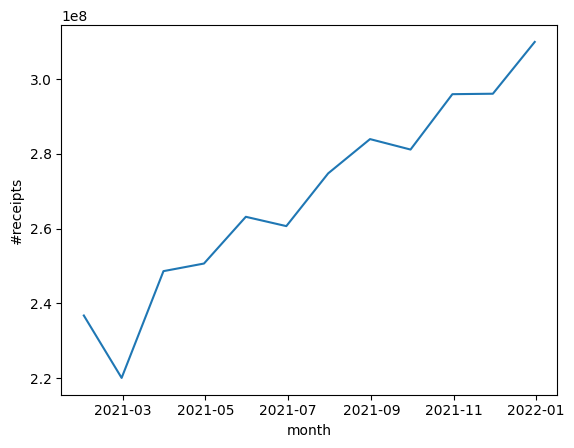

In [ ]:
df = read_csv()
receipts = list(df['Receipt_Count'].values)
plt.plot(df['dates'], df['Receipt_Count'])
plt.xlabel('month')
plt.ylabel('#receipts')
plt.show()

## MLP as a forecasting model.

In this project we have created a light-weight neural network with a single hidden layer and ReLU non-linearity. The model will take sequence of inputs at a time and regresses the number of receipts for the next month.

The model is able to learn the non-linear increase in the data and continue to make very good predictions for the receipts over the months of year 2022.

**Let's dive in!**

We will import all the dependencies that are needed to make predictions from the model.

In [ ]:
from receipt_prediction import *
from hyperparams import *
from data_utils import *

## Choosing The Best Model

We trained a bunch of models to take different context size to make predictions. The context size are from 2 to 9. We will evaluate these models on validation data that the model has not seen during traning and choose the model with least error on that.

seq_len: 2 rmse error: 0.13115440389757738
seq_len: 3 rmse error: 0.32772774718065323
seq_len: 4 rmse error: 0.36408953832328905
seq_len: 5 rmse error: 0.36384024732765213
seq_len: 6 rmse error: 0.21549483392413474
seq_len: 7 rmse error: 0.39772607831032486
seq_len: 8 rmse error: 0.2581874115472114
seq_len: 9 rmse error: 0.34532113172349765


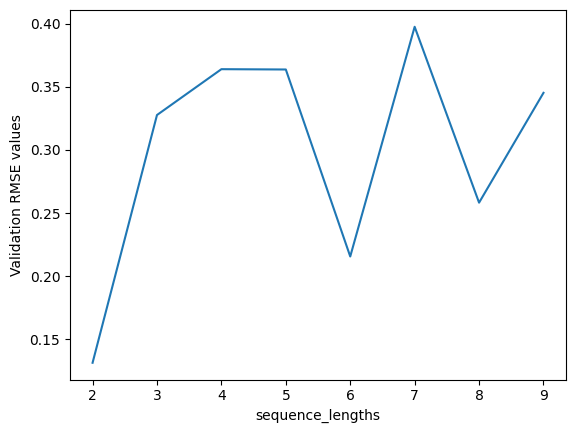

best_seq_len: 2


In [ ]:
best_seq_len = get_best_model(receipts, True)
print('best_seq_len:', best_seq_len)

Now that we have our best performing model, we will use it to make predictions. Below cell forecasts the number of receipts for each month in the year 2022.

In [ ]:
months = [i for i in range(1, 13)]
for m in months:
  receipt_pred = prediction_pipeline(m, best_seq_len, receipts)
  print('month:', m, 'receipts:', receipt_pred)

month: 1 receipts: 310771168.0
month: 2 receipts: 323092864.0
month: 3 receipts: 325493184.0
month: 4 receipts: 336808320.0
month: 5 receipts: 340535616.0
month: 6 receipts: 351194752.0
month: 7 receipts: 355993760.0
month: 8 receipts: 366270048.0
month: 9 receipts: 371948128.0
month: 10 receipts: 382058880.0
month: 11 receipts: 388488128.0
month: 12 receipts: 398583968.0
